In [2]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
from adjustText import adjust_text
import re
from matplotlib.ticker import FuncFormatter
import plotly.express as px

# Dataset Loading
car = pd.read_csv(r"C:\Users\DELL\Desktop\Regonet_project\automobile_dataset.csv")

car.sample(10, random_state=42)  # Displaying 10 random samples from the dataset

# make a copy of the dataset
car_1 = car.copy()

# Data Cleaning

# Removing extra space (including multiple internal spaces) from all string cells
for col in car_1.select_dtypes(include='object'):
    car_1[col] = car_1[col].map(lambda x: re.sub(r'\s+', ' ', x).strip() if isinstance(x,str) else x)

# Rename the columns to remove hyphens and replace them with underscores
car_1 = car_1.rename(columns={'highway-mpg': 'highway_mpg', 'city-mpg': 'city_mpg','peak-rpm': 'peak_rpm','compression-ratio': 'compression_ratio',
                      'fuel-system': 'fuel_system','engine-size': 'engine_size','num-of-cylinders': 'num_of_cylinders','engine-type': 'engine_type',
                      'curb-weight': 'curb_weight','wheel-base': 'wheel_base','engine-location': 'engine_location','drive-wheels': 'drive_wheels',
                      'body-style': 'body_style','num-of-doors': 'num_of_doors','fuel-type': 'fuel_type','normalized-losses': 'normalized_losses',})

# Convert numeric columns
numeric_cols = ['price', 'highway_mpg', 'city_mpg', 'peak_rpm', 'horsepower',
       'compression_ratio', 'stroke', 'bore', 'engine_size',
       'num_of_cylinders', 'curb_weight', 'height', 'width',
       'length', 'wheel_base', 'num-of-doors', 'normalized_losses',
       'symboling']

# dealing with missing values in the car dataset

car_1['price'] = car_1['price'].fillna(car_1['price'].median())                                              # Filling missing values in 'price' with the median value of the column
car_1['peak_rpm'] = car_1['peak_rpm'].fillna(car_1['peak_rpm'].median())                                     # Filling missing values in 'peak_rpm' with the median value of the column
car_1['horsepower'] = car_1['horsepower'].fillna(car_1['horsepower'].median())                               # Filling missing values in 'horsepower' with the median value of the column
car_1['stroke'] = car_1['stroke'].fillna(car_1['stroke'].median())                                           # Filling missing values in 'stroke' with the median value of the column
car_1['bore'] = car_1['bore'].fillna(car_1['bore'].median())                                                 # Filling missing values in 'bore' with the median value of the column
car_1['num_of_doors'] = car_1['num_of_doors'].fillna(car_1['num_of_doors'].mode())                           # Filling missing values in 'num_of_doors' with the mode value of the column
car_1['normalized_losses'] = car_1['normalized_losses'].fillna(car_1['normalized_losses'].median())          # Filling missing values in 'normalized_losses' with the median value of the column

# Top 10 Cars by Average Price.

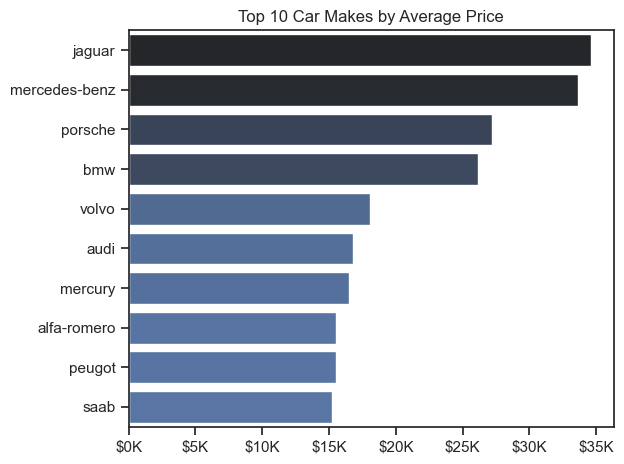

In [3]:
# Top 10 cars makes by avrage price
top_10_cars_by_avg_price = (
      car_1.groupby('make')['price']
     .mean()
     .round(0)
     .astype(int)
     .sort_values(ascending=False)
     .reset_index(name='avg_price')
     .head(10)
)

sns.set_theme(style="ticks")

sns.barplot(data =top_10_cars_by_avg_price , x = 'avg_price', y= 'make',  hue='avg_price', palette ='dark:b_r')
plt.title('Top 10 Car Makes by Average Price')
plt.ylabel('')
plt.xlabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.legend().remove()

plt.tight_layout()
plt.show()

# Top 10 car Makes by Average Normalized Losses

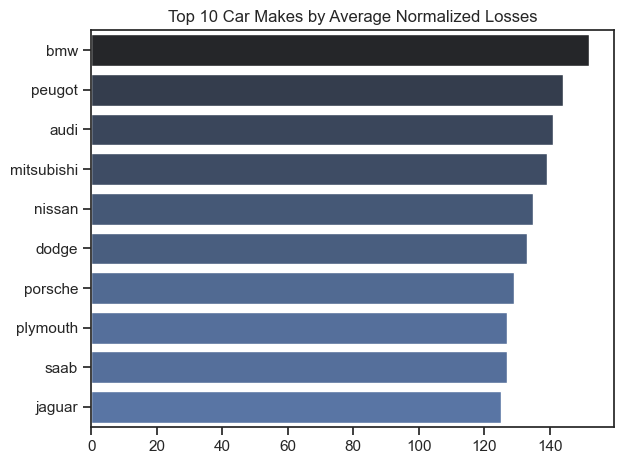

In [4]:
# Top 10 cars makes by average normalized-losses
top_10_cars_by_avg_normalized_losses = (
      car_1.groupby('make')['normalized_losses']
     .mean()
     .round(0)
     .astype(int)
     .sort_values(ascending=False)
     .reset_index(name='avg_normalized_losses')
     .head(10)
)

sns.set_theme(style="ticks")

sns.barplot(data =top_10_cars_by_avg_normalized_losses , x = 'avg_normalized_losses', y= 'make',  hue='avg_normalized_losses', palette ='dark:b_r')
plt.title('Top 10 Car Makes by Average Normalized Losses')
plt.ylabel('')
plt.xlabel('')

plt.legend().remove()

plt.tight_layout()
plt.show()

# Car Price by Fuel Type

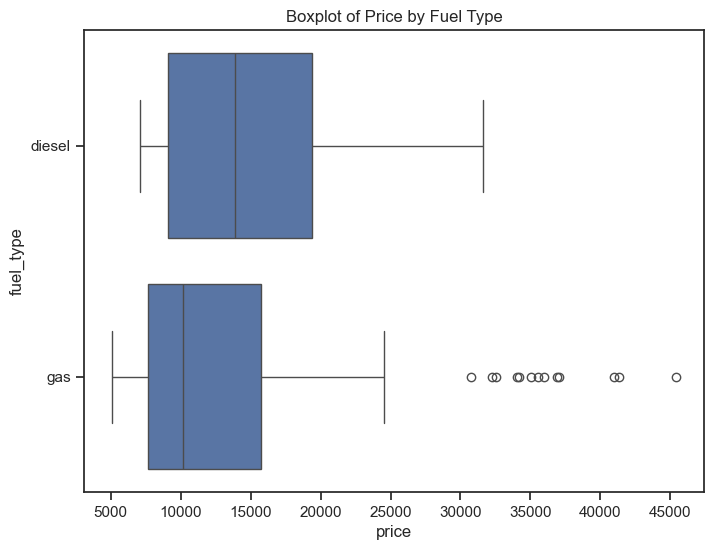

In [5]:
fuel_type_order = car_1.groupby('fuel_type')['price'].median().sort_values(ascending=False).index
# 5. Boxplot of Price by Fuel Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', y='fuel_type', data=car_1, vert=False, order=fuel_type_order)
plt.title("Boxplot of Price by Fuel Type")
plt.show()

# Top 5 Cars by Average Normalized Losses

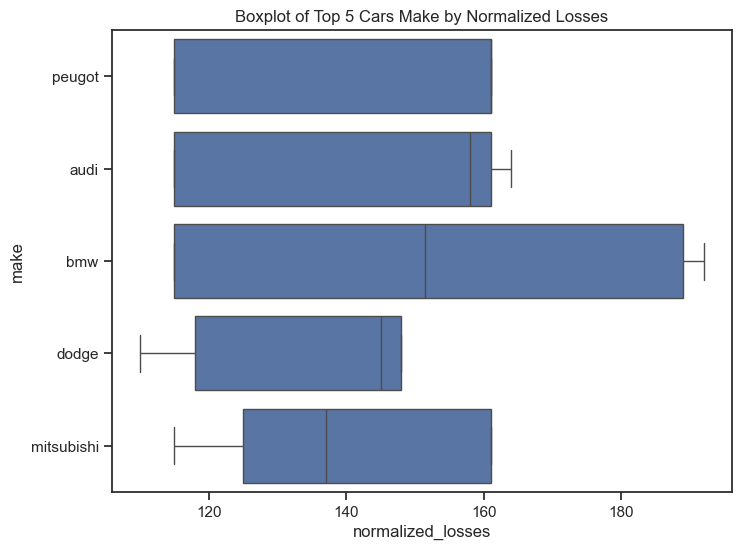

In [7]:
car_make_order = car_1.groupby('make')['normalized_losses'].median().sort_values(ascending=False).head(5).index
# 5. Boxplot of Price by Fuel Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='normalized_losses', y='make', data=car_1, vert=False, order=car_make_order)
plt.title("Boxplot of Top 5 Cars Make by Normalized Losses")
plt.show()

# Comparing Average Normalized Losses and Average prices of Bottom and Top 10 Cars 

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


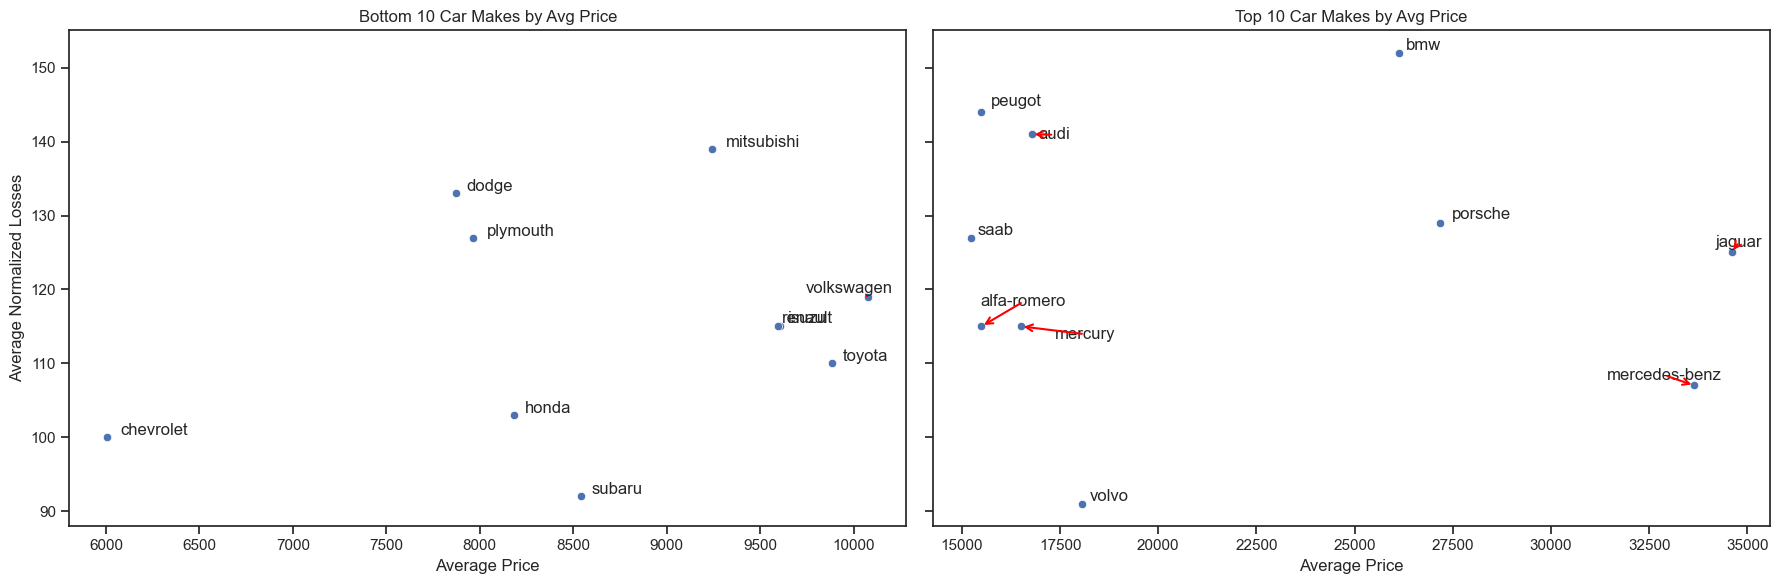

In [6]:

# Group and prepare data
car_grouped = (
    car_1.groupby('make')[['price', 'normalized_losses']]
    .mean()
    .round(0)
    .astype(int)
    .reset_index()
    .rename(columns={'price': 'avg_price', 'normalized_losses': 'avg_normalized_losses'})
)

# Top 10 by avg_price
top_10_cars_by_avg_price = car_grouped.sort_values(
    by=['avg_price', 'avg_normalized_losses'], ascending=False
).head(10)

# Bottom 10 by avg_price
bottom_10_cars_by_avg_price = car_grouped.sort_values(
    by=['avg_price', 'avg_normalized_losses'], ascending=False
).tail(10)

# Set the style
sns.set_theme(style="ticks")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# --- Plot 1: Top 10 ---
sns.scatterplot(
    data=bottom_10_cars_by_avg_price,
    x='avg_price',
    y='avg_normalized_losses',
    ax=axes[0]
)

texts1 = []
for i in range(len(bottom_10_cars_by_avg_price)):
    texts1.append(
        axes[0].text(
            bottom_10_cars_by_avg_price['avg_price'].iloc[i],
            bottom_10_cars_by_avg_price['avg_normalized_losses'].iloc[i],
            bottom_10_cars_by_avg_price['make'].iloc[i]
        )
    )
adjust_text(texts1, ax=axes[0], arrowprops=dict(arrowstyle='->', color='red', lw=1))

axes[0].set_title('Bottom 10 Car Makes by Avg Price')
axes[0].set_xlabel('Average Price')
axes[0].set_ylabel('Average Normalized Losses')

# --- Plot 2: Bottom 10 ---
sns.scatterplot(
    data=top_10_cars_by_avg_price,
    x='avg_price',
    y='avg_normalized_losses',
    ax=axes[1]
)

texts2 = []
for i in range(len(top_10_cars_by_avg_price)):
    texts2.append(
        axes[1].text(
            top_10_cars_by_avg_price['avg_price'].iloc[i],
            top_10_cars_by_avg_price['avg_normalized_losses'].iloc[i],
            top_10_cars_by_avg_price['make'].iloc[i]
        )
    )
adjust_text(
    texts2,
    ax=axes[1],
    arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
    expand_points=(2, 2),
    expand_text=(2, 2),
    force_text=0.7,
    force_points=0.7,
    lim=1000,
    precision=0.01,
    autoalign='xy'
)

axes[1].set_title('Top 10 Car Makes by Avg Price')
axes[1].set_xlabel('Average Price')
axes[1].set_ylabel('')

# Final layout tweaks
plt.tight_layout()
plt.show()


# Comparing Average Normalized Losses, Average Car Prices and Fuel Type of Top Bottom and Top 10 Cars

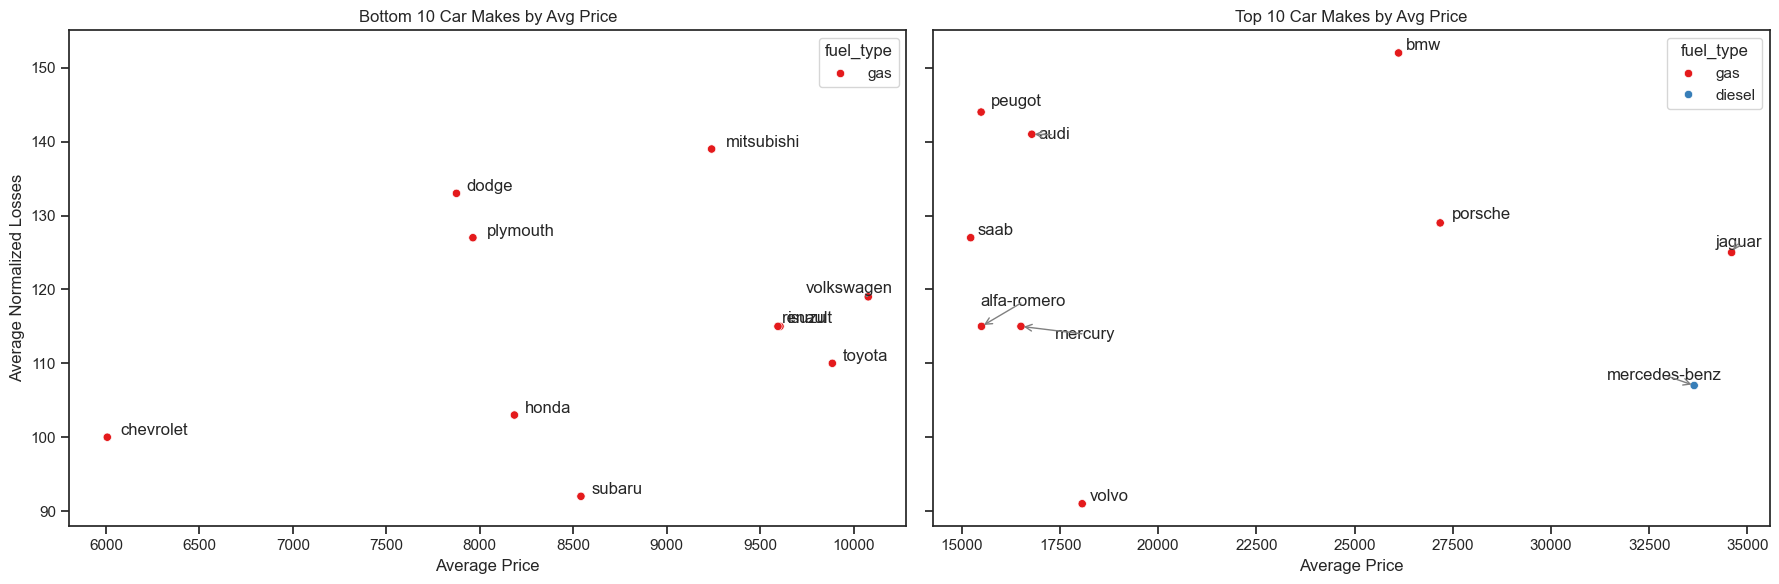

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Group and prepare data (include fuel_type using mode)
car_grouped = (
    car_1.groupby('make')
    .agg(
        avg_price=('price', 'mean'),
        avg_normalized_losses=('normalized_losses', 'mean'),
        fuel_type=('fuel_type', lambda x: x.mode()[0])  # get most common fuel type per make
    )
    .round(0)
    .reset_index()
)

# Convert to appropriate data types
car_grouped['avg_price'] = car_grouped['avg_price'].astype(int)
car_grouped['avg_normalized_losses'] = car_grouped['avg_normalized_losses'].astype(int)

# Top 10 by avg_price
top_10_cars_by_avg_price = car_grouped.sort_values(
    by=['avg_price', 'avg_normalized_losses'], ascending=False
).head(10)

# Bottom 10 by avg_price
bottom_10_cars_by_avg_price = car_grouped.sort_values(
    by=['avg_price', 'avg_normalized_losses'], ascending=False
).tail(10)

# Set the style
sns.set_theme(style="ticks")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# --- Plot 1: Bottom 10 ---
sns.scatterplot(
    data=bottom_10_cars_by_avg_price,
    x='avg_price',
    y='avg_normalized_losses',
    hue='fuel_type',
    palette='Set1',
    ax=axes[0]
)

texts1 = []
for i in range(len(bottom_10_cars_by_avg_price)):
    texts1.append(
        axes[0].text(
            bottom_10_cars_by_avg_price['avg_price'].iloc[i],
            bottom_10_cars_by_avg_price['avg_normalized_losses'].iloc[i],
            bottom_10_cars_by_avg_price['make'].iloc[i]
        )
    )
adjust_text(texts1, ax=axes[0], arrowprops=dict(arrowstyle='->', color='gray', lw=1))

axes[0].set_title('Bottom 10 Car Makes by Avg Price')
axes[0].set_xlabel('Average Price')
axes[0].set_ylabel('Average Normalized Losses')

# --- Plot 2: Top 10 ---
sns.scatterplot(
    data=top_10_cars_by_avg_price,
    x='avg_price',
    y='avg_normalized_losses',
    hue='fuel_type',
    palette='Set1',
    ax=axes[1]
)

texts2 = []
for i in range(len(top_10_cars_by_avg_price)):
    texts2.append(
        axes[1].text(
            top_10_cars_by_avg_price['avg_price'].iloc[i],
            top_10_cars_by_avg_price['avg_normalized_losses'].iloc[i],
            top_10_cars_by_avg_price['make'].iloc[i]
        )
    )
adjust_text(
    texts2,
    ax=axes[1],
    arrowprops=dict(arrowstyle='->', color='gray', lw=1),
    expand_points=(2, 2),
    expand_text=(2, 2),
    force_text=0.7,
    force_points=0.7,
    lim=1000,
    precision=0.01,
    autoalign='xy'
)

axes[1].set_title('Top 10 Car Makes by Avg Price')
axes[1].set_xlabel('Average Price')
axes[1].set_ylabel('')

# Final layout tweaks
plt.tight_layout()
plt.show()


# Comparing Average Normalized Losses, Average Prices and Symboling of Top bottom and Top 10 Cars

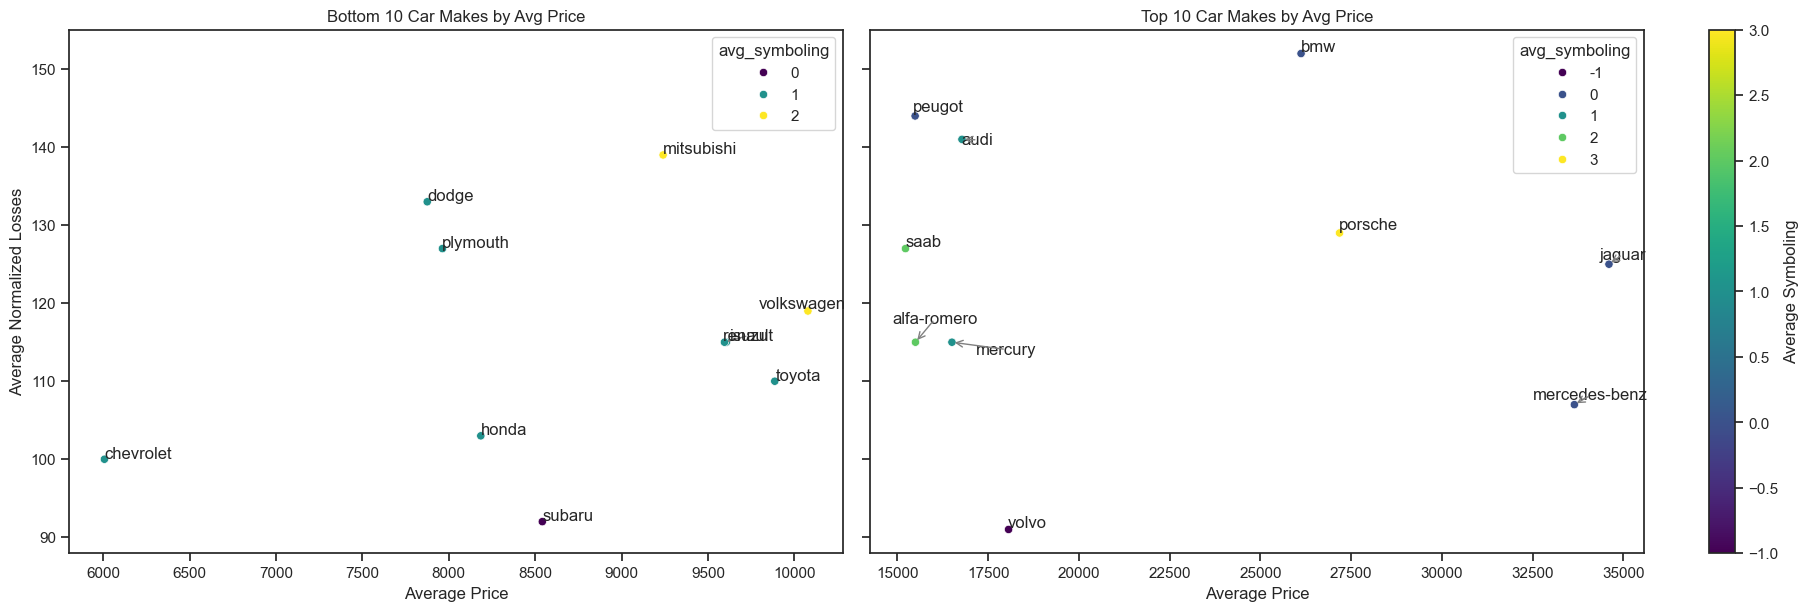

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Group and prepare data (include avg engine size and symboling)
car_grouped = (
    car_1.groupby('make')
    .agg(
        avg_price=('price', 'mean'),
        avg_normalized_losses=('normalized_losses', 'mean'),
        avg_engine_size=('engine_size', 'mean'),
        avg_symboling=('symboling', 'mean')  # Average symboling per make
    )
    .round(0)
    .reset_index()
)

# Convert to appropriate data types
car_grouped['avg_price'] = car_grouped['avg_price'].astype(int)
car_grouped['avg_normalized_losses'] = car_grouped['avg_normalized_losses'].astype(int)
car_grouped['avg_engine_size'] = car_grouped['avg_engine_size'].astype(int)
car_grouped['avg_symboling'] = car_grouped['avg_symboling'].astype(int)  # Ensure symboling is an integer

# Top 10 by avg_price
top_10_cars_by_avg_price = car_grouped.sort_values(
    by=['avg_price', 'avg_normalized_losses'], ascending=False
).head(10)

# Bottom 10 by avg_price
bottom_10_cars_by_avg_price = car_grouped.sort_values(
    by=['avg_price', 'avg_normalized_losses'], ascending=False
).tail(10)

# Set the style
sns.set_theme(style="ticks")

# Create subplots
# Create subplots with constrained_layout
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True, constrained_layout=True)


# --- Plot 1: Bottom 10 ---
scatter1 = sns.scatterplot(
    data=bottom_10_cars_by_avg_price,
    x='avg_price',
    y='avg_normalized_losses',
    hue='avg_symboling',  # Change hue to symboling
    palette='viridis',
    ax=axes[0],
    legend='full'  # Show legend for symboling
)

texts1 = []
for i in range(len(bottom_10_cars_by_avg_price)):
    texts1.append(
        axes[0].text(
            bottom_10_cars_by_avg_price['avg_price'].iloc[i],
            bottom_10_cars_by_avg_price['avg_normalized_losses'].iloc[i],
            bottom_10_cars_by_avg_price['make'].iloc[i]
        )
    )
adjust_text(texts1, ax=axes[0], arrowprops=dict(arrowstyle='->', color='gray', lw=1))

axes[0].set_title('Bottom 10 Car Makes by Avg Price')
axes[0].set_xlabel('Average Price')
axes[0].set_ylabel('Average Normalized Losses')

# --- Plot 2: Top 10 ---
scatter2 = sns.scatterplot(
    data=top_10_cars_by_avg_price,
    x='avg_price',
    y='avg_normalized_losses',
    hue='avg_symboling',  # Change hue to symboling
    palette='viridis',
    ax=axes[1],
    legend='full'  # Show legend for symboling
)

texts2 = []
for i in range(len(top_10_cars_by_avg_price)):
    texts2.append(
        axes[1].text(
            top_10_cars_by_avg_price['avg_price'].iloc[i],
            top_10_cars_by_avg_price['avg_normalized_losses'].iloc[i],
            top_10_cars_by_avg_price['make'].iloc[i]
        )
    )
adjust_text(
    texts2,
    ax=axes[1],
    arrowprops=dict(arrowstyle='->', color='gray', lw=1),
    expand_points=(2, 2),
    expand_text=(2, 2),
    force_text=0.7,
    force_points=0.7,
    lim=1000,
    precision=0.01,
    autoalign='xy'
)

axes[1].set_title('Top 10 Car Makes by Avg Price')
axes[1].set_xlabel('Average Price')
axes[1].set_ylabel('')

# Add colorbar for symboling
norm = plt.Normalize(car_grouped['avg_symboling'].min(), car_grouped['avg_symboling'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # Empty array for the colorbar
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Average Symboling')

# Final layout tweaks
plt.show()


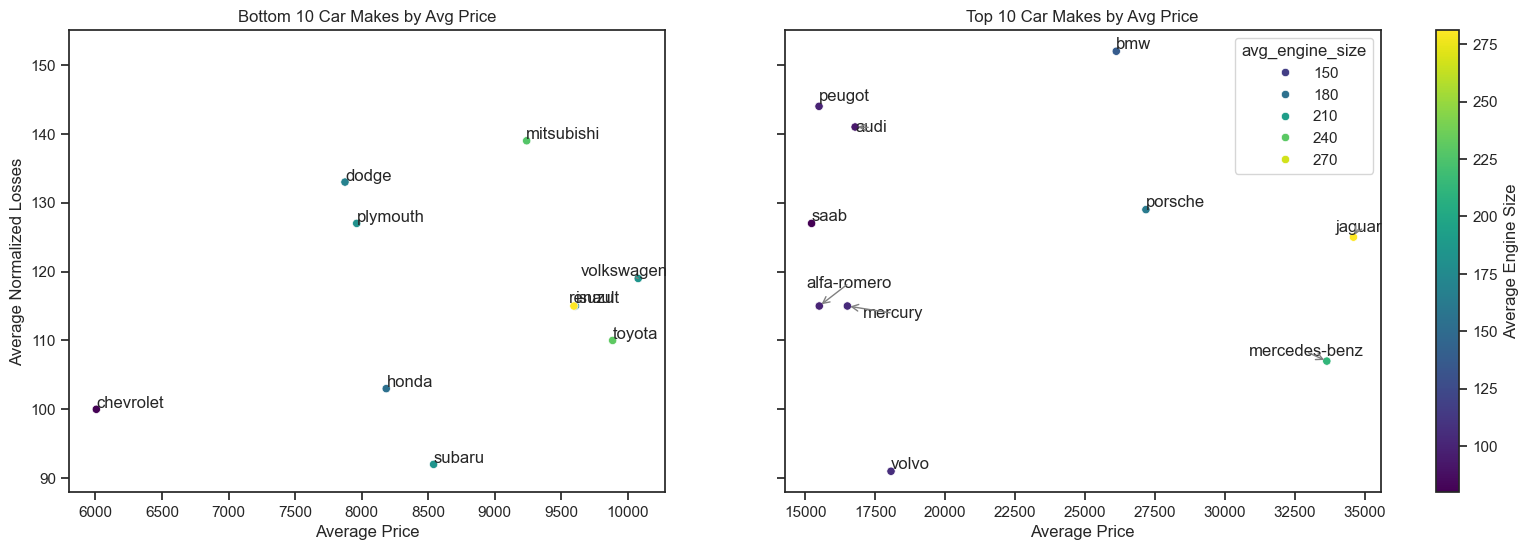

In [13]:

# Group and prepare data (include average engine_size)
car_grouped = (
    car_1.groupby('make')
    .agg(
        avg_price=('price', 'mean'),
        avg_normalized_losses=('normalized_losses', 'mean'),
        avg_engine_size=('engine_size', 'mean')
    )
    .round(0)
    .reset_index()
)

# Convert to appropriate data types
car_grouped['avg_price'] = car_grouped['avg_price'].astype(int)
car_grouped['avg_normalized_losses'] = car_grouped['avg_normalized_losses'].astype(int)
car_grouped['avg_engine_size'] = car_grouped['avg_engine_size'].astype(int)

# Top 10 by avg_price
top_10_cars_by_avg_price = car_grouped.sort_values(
    by=['avg_price', 'avg_normalized_losses'], ascending=False
).head(10)

# Bottom 10 by avg_price
bottom_10_cars_by_avg_price = car_grouped.sort_values(
    by=['avg_price', 'avg_normalized_losses'], ascending=False
).tail(10)

# Set the style
sns.set_theme(style="ticks")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# --- Plot 1: Bottom 10 ---
scatter1 = sns.scatterplot(
    data=bottom_10_cars_by_avg_price,
    x='avg_price',
    y='avg_normalized_losses',
    hue='avg_engine_size',
    palette='viridis',
    ax=axes[0],
    legend=False
)

texts1 = []
for i in range(len(bottom_10_cars_by_avg_price)):
    texts1.append(
        axes[0].text(
            bottom_10_cars_by_avg_price['avg_price'].iloc[i],
            bottom_10_cars_by_avg_price['avg_normalized_losses'].iloc[i],
            bottom_10_cars_by_avg_price['make'].iloc[i]
        )
    )
adjust_text(texts1, ax=axes[0], arrowprops=dict(arrowstyle='->', color='gray', lw=1))

axes[0].set_title('Bottom 10 Car Makes by Avg Price')
axes[0].set_xlabel('Average Price')
axes[0].set_ylabel('Average Normalized Losses')

# --- Plot 2: Top 10 ---
scatter2 = sns.scatterplot(
    data=top_10_cars_by_avg_price,
    x='avg_price',
    y='avg_normalized_losses',
    hue='avg_engine_size',
    palette='viridis',
    ax=axes[1]
)

texts2 = []
for i in range(len(top_10_cars_by_avg_price)):
    texts2.append(
        axes[1].text(
            top_10_cars_by_avg_price['avg_price'].iloc[i],
            top_10_cars_by_avg_price['avg_normalized_losses'].iloc[i],
            top_10_cars_by_avg_price['make'].iloc[i]
        )
    )
adjust_text(
    texts2,
    ax=axes[1],
    arrowprops=dict(arrowstyle='->', color='gray', lw=1),
    expand_points=(2, 2),
    expand_text=(2, 2),
    force_text=0.7,
    force_points=0.7,
    lim=1000,
    precision=0.01,
    autoalign='xy'
)

axes[1].set_title('Top 10 Car Makes by Avg Price')
axes[1].set_xlabel('Average Price')
axes[1].set_ylabel('')

# Add shared colorbar
norm = plt.Normalize(car_grouped['avg_engine_size'].min(), car_grouped['avg_engine_size'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Average Engine Size')

# Final layout
plt.show()
